In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from collections import Counter
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import random
import graphviz

In [26]:
colnames = ['buying_price', 'maintenance','doors','persons', 'lug_boot', 'safety','Class_Values']

car_data = pd.read_csv("car.data", names = colnames)

# storing this dataframe in a csv file
car_data.to_csv('car.csv')




In [27]:
car_data

,buying_price,maintenance,doors,persons,lug_boot,safety,Class_Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [44]:
car_data.describe(include='object')

,buying_price,maintenance,doors,persons,lug_boot,safety,Class_Values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


count      1728
unique        4
top       vhigh
freq        432
Name: buying_price, dtype: object


In [40]:
for column in car_data.select_dtypes(include='category'):
    print(f"Column: {column}")
    print(car_data[column].unique())
    print()

In [42]:
for column in car_data.select_dtypes(include='category'):
    print(f"Column: {column}")
    print(car_data[column].value_counts())
    print()

In [35]:
# Select categorical columns to encode
categorical_cols = ['buying_price', 'maintenance','doors', 'persons', 'lug_boot', 'safety', 'Class_Values']

# Initialize the encoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(car_data[categorical_cols])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([car_data, encoded_df], axis=1)


C:\Users\Asus\Anaconda4\envs\Data_Analytics\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


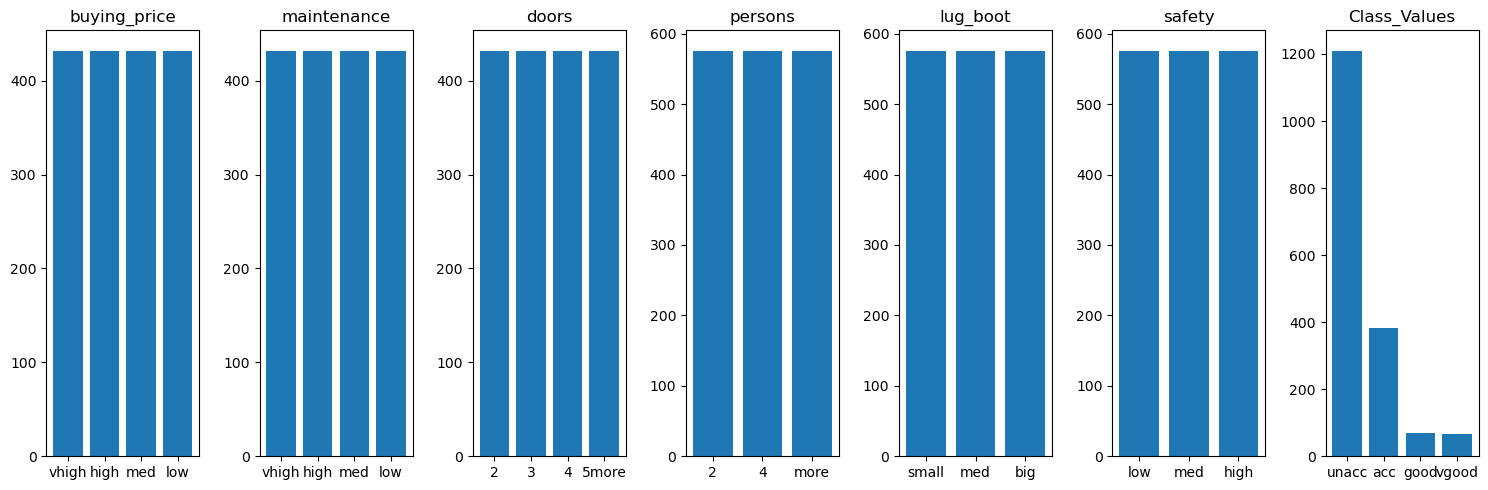

In [29]:
# Calculate the number of categorical variables
num_vars = len(categorical_cols)

# Create a figure and subplots
fig, axes = plt.subplots(1, num_vars, figsize=(15, 5))

# Iterate over the categorical variables and plot the bar chart
for i, col in enumerate(categorical_cols):
    # Count the occurrences of each category
    counts = df_encoded[col].value_counts()
    
    # Plot the bar chart for the current variable
    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
# Select categorical columns to encode
categorical_cols = ['buying_price', 'maintenance','doors', 'persons', 'lug_boot', 'safety', 'Class_Values']

# Initialize the encoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(car_data[categorical_cols])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([car_data, encoded_df], axis=1)


C:\Users\Asus\Anaconda4\envs\Data_Analytics\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


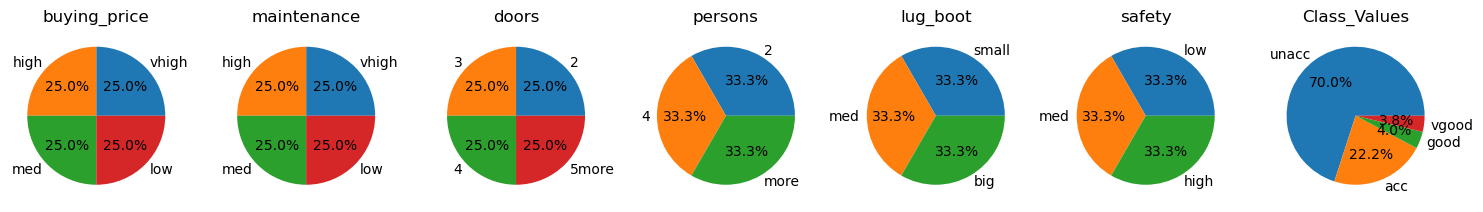

In [48]:
# Calculate the number of categorical variables
num_vars = len(categorical_cols)

# Create a figure and subplots
fig, axes = plt.subplots(1, num_vars, figsize=(15, 5))

# Iterate over the categorical variables and plot the pie chart
for i, col in enumerate(categorical_cols):
    # Count the occurrences of each category
    counts = df_encoded[col].value_counts()
    
    # Plot the pie chart for the current variable
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
np.random.seed(0)
trainIndex = np.random.choice(car_data.shape[0], size=1209,replace=False)
train = car_data.iloc[trainIndex]
test = car_data.iloc[~car_data.index.isin(trainIndex)]
features = train.columns

In [34]:
y_train.unique()

array(['unacc', 'good', 'acc', 'vgood'], dtype=object)

In [32]:
X_train = train.drop(columns=['Class_Values'])
X_train = pd.get_dummies(X_train)

y_train = train['Class_Values']

X_test = test.drop(columns=['Class_Values'])
X_test = pd.get_dummies(X_test)
y_test = test['Class_Values']


In [33]:
X_train

,buying_price_high,buying_price_low,buying_price_med,buying_price_vhigh,maintenance_high,maintenance_low,maintenance_med,maintenance_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1318,0,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
124,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
648,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
249,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1599,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
1046,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
585,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


# Decision Tree Classification

In [21]:
model = tree.DecisionTreeClassifier(max_depth=7, random_state =48)
model.fit(X=X_train, y=y_train)
train_y_predict = model.predict(X_train)
test_y_predict = model.predict(X_test)

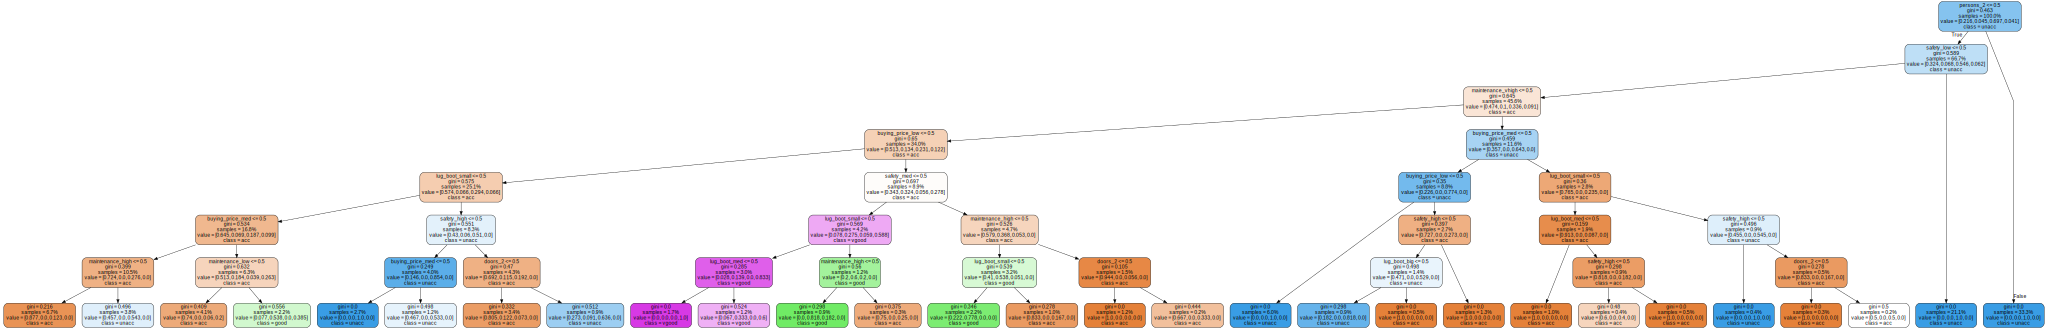

In [22]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names = X_train.columns, class_names = model.classes_, filled=True,
                               rounded=True, leaves_parallel=True, proportion=True)
#graph = grp.Source(dot_data)
graph = graphviz.Source(dot_data)
graph

In [23]:
graph.render('decision tree', format='svg')

'decision tree.svg'

In [24]:
pd.crosstab(test_y_predict, y_test)

Class_Values,acc,good,unacc,vgood
row_0,,,,
acc,98,1,7,3
good,1,12,0,3
unacc,22,0,360,0
vgood,2,1,0,9


In [25]:

cr6 = classification_report(y_train, train_y_predict)
print("CLASSIFICATION REPORT: DecisionTreeClassifier")
print(cr6)

CLASSIFICATION REPORT: DecisionTreeClassifier
              precision    recall  f1-score   support

         acc       0.85      0.84      0.85       261
        good       0.69      0.80      0.74        55
       unacc       0.96      0.97      0.97       843
       vgood       0.83      0.60      0.70        50

    accuracy                           0.92      1209
   macro avg       0.83      0.80      0.81      1209
weighted avg       0.92      0.92      0.92      1209



In [26]:
cr7 = classification_report(y_test, test_y_predict)
print("CLASSIFICATION REPORT: DecisionTreeClassifier")
print(cr7)

CLASSIFICATION REPORT: DecisionTreeClassifier
              precision    recall  f1-score   support

         acc       0.90      0.80      0.84       123
        good       0.75      0.86      0.80        14
       unacc       0.94      0.98      0.96       367
       vgood       0.75      0.60      0.67        15

    accuracy                           0.92       519
   macro avg       0.84      0.81      0.82       519
weighted avg       0.92      0.92      0.92       519



In [27]:
print('Train confusion matrix: ', confusion_matrix(y_train, model.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, model.predict(X_test)))

Train confusion matrix:  [[219   8  33   1]
 [  5  44   1   5]
 [ 23   2 818   0]
 [ 10  10   0  30]]
Test confusion matrix:  [[ 98   1  22   2]
 [  1  12   0   1]
 [  7   0 360   0]
 [  3   3   0   9]]


# SUPPORT VECTOR CLASSIFICATION

In [28]:

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_predicted_train = svm_model.predict(X_train)
y_predicted_test = svm_model.predict(X_test)


In [29]:
cr1 = classification_report(y_train, y_predicted_train)
print()
print(cr1)


              precision    recall  f1-score   support

         acc       0.98      0.98      0.98       261
        good       0.93      0.98      0.96        55
       unacc       1.00      0.99      1.00       843
       vgood       0.96      1.00      0.98        50

    accuracy                           0.99      1209
   macro avg       0.97      0.99      0.98      1209
weighted avg       0.99      0.99      0.99      1209



In [30]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_predicted_test)
print("CLASSIFICATION REPORT: SUPPORT VECTOR CLASSIFICATION")
print(cr)

CLASSIFICATION REPORT: SUPPORT VECTOR CLASSIFICATION
              precision    recall  f1-score   support

         acc       0.97      0.98      0.97       123
        good       0.88      1.00      0.93        14
       unacc       1.00      0.99      0.99       367
       vgood       0.94      1.00      0.97        15

    accuracy                           0.98       519
   macro avg       0.94      0.99      0.97       519
weighted avg       0.99      0.98      0.98       519



In [31]:
from sklearn.model_selection import GridSearchCV

grid_of_values ={'C':[1, 100], 'kernel':['linear', 'rbf']}
grid_model = GridSearchCV(estimator=SVC(), param_grid=grid_of_values, cv=5)
grid_model.fit(X_train,y_train)
best_params = grid_model.best_params_
print(best_params)


{'C': 100, 'kernel': 'rbf'}


In [32]:
svm_model2 = SVC(C=best_params['C'], kernel=best_params['kernel'])
svm_model2.fit(X_train, y_train)
y_pred_train = svm_model2.predict(X_train)
y_pred_test = svm_model2.predict(X_test)


In [33]:
cr2 = classification_report(y_train, y_pred_train)

print(cr2)

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       261
        good       1.00      1.00      1.00        55
       unacc       1.00      1.00      1.00       843
       vgood       1.00      1.00      1.00        50

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



In [34]:
cr3 = classification_report(y_test, y_pred_test)

print(cr3)

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       123
        good       1.00      1.00      1.00        14
       unacc       1.00      1.00      1.00       367
       vgood       1.00      1.00      1.00        15

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



# LOGISTIC REGRESSION

In [35]:
lrg_model = LogisticRegression()
lrg_model.fit(X_train, y_train)
y_predict_train = lrg_model.predict(X_train)
y_predict_test = lrg_model.predict(X_test)


In [36]:
cr4 = classification_report(y_train, y_predict_train)
print("CLASSIFICATION REPORT: LOGISTIC REGRESSION")
print(cr4)

CLASSIFICATION REPORT: LOGISTIC REGRESSION
              precision    recall  f1-score   support

         acc       0.79      0.89      0.83       261
        good       0.71      0.49      0.58        55
       unacc       0.98      0.95      0.97       843
       vgood       0.94      0.98      0.96        50

    accuracy                           0.92      1209
   macro avg       0.85      0.83      0.83      1209
weighted avg       0.92      0.92      0.92      1209



In [37]:
cr5 = classification_report(y_test, y_predict_test)
print("CLASSIFICATION REPORT: LOGISTIC REGRESSION")
print(cr5)

CLASSIFICATION REPORT: LOGISTIC REGRESSION
              precision    recall  f1-score   support

         acc       0.85      0.88      0.86       123
        good       0.71      0.36      0.48        14
       unacc       0.97      0.98      0.97       367
       vgood       0.87      0.87      0.87        15

    accuracy                           0.93       519
   macro avg       0.85      0.77      0.79       519
weighted avg       0.93      0.93      0.93       519



# RANDOM FOREST CLASSIFICATION

In [38]:
randomforest = RandomForestClassifier(max_depth=7, random_state = 48)
randomforest.fit(X_train, y_train)

yp_train = randomforest.predict(X_train)
yp_test = randomforest.predict(X_test)


In [39]:
cr8 = classification_report(y_train, yp_train)

print(cr8)

              precision    recall  f1-score   support

         acc       0.85      1.00      0.92       261
        good       1.00      0.45      0.62        55
       unacc       1.00      0.99      0.99       843
       vgood       0.98      0.86      0.91        50

    accuracy                           0.96      1209
   macro avg       0.96      0.83      0.86      1209
weighted avg       0.97      0.96      0.96      1209



In [40]:
cr9 = classification_report(y_test, yp_test)
print("CLASSIFICATION REPORT: RANDOM FOREST CLASSIFICATION")
print(cr9)

CLASSIFICATION REPORT: RANDOM FOREST CLASSIFICATION
              precision    recall  f1-score   support

         acc       0.86      0.97      0.91       123
        good       1.00      0.21      0.35        14
       unacc       0.99      0.99      0.99       367
       vgood       0.91      0.67      0.77        15

    accuracy                           0.95       519
   macro avg       0.94      0.71      0.76       519
weighted avg       0.96      0.95      0.95       519



In [12]:
models = ['DecisionTreeClassifier ', 'svm model', 'lrg model', 'randomforest']
accuracy = [0.92, 0.98, 0.93, 0.95]
precision = [0.92, 0.99, 0.93, 0.96]


In [13]:
bar_width = 0.35


In [14]:
x = np.arange(len(models))


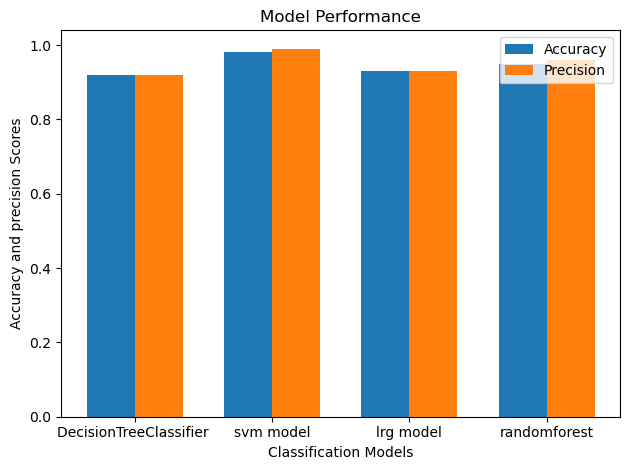

In [15]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - bar_width/2, accuracy, bar_width, label='Accuracy')
rects2 = ax.bar(x + bar_width/2, precision, bar_width, label='Precision')

ax.set_xlabel('Classification Models')
ax.set_ylabel('Accuracy and precision Scores')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()
